In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
plt.rcParams['figure.facecolor'] = '.0'
plt.rcParams['axes.facecolor'] = '.1'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['text.color'] = 'white'
plt.rcParams['xtick.color'] = 'green'
plt.rcParams['ytick.color'] = 'green'
plt.rcParams['axes.edgecolor'] = 'purple'

In [2]:
births = pd.read_csv('births.csv')

#outlier removal
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

dates = 10000 * births.year + 100 * births.month + births.day
births.index = pd.to_datetime(dates, format='%Y%m%d')

births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.to_datetime('2012-{}-{}'.format(month, day))
                        for (month, day) in births_by_date.index]

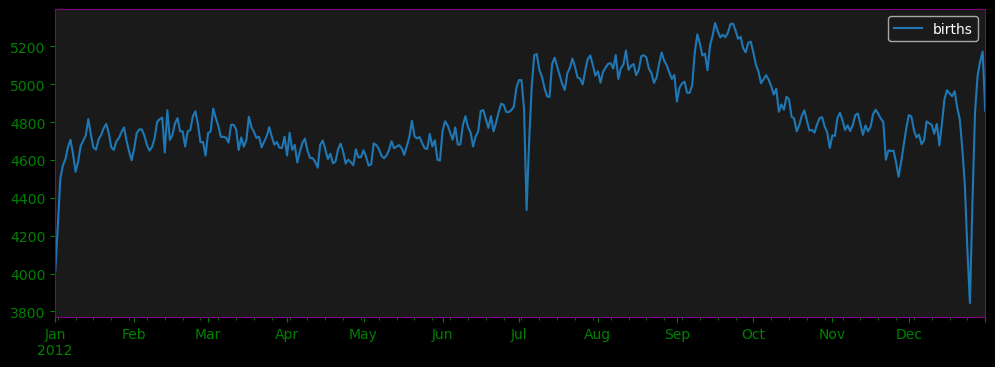

In [3]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

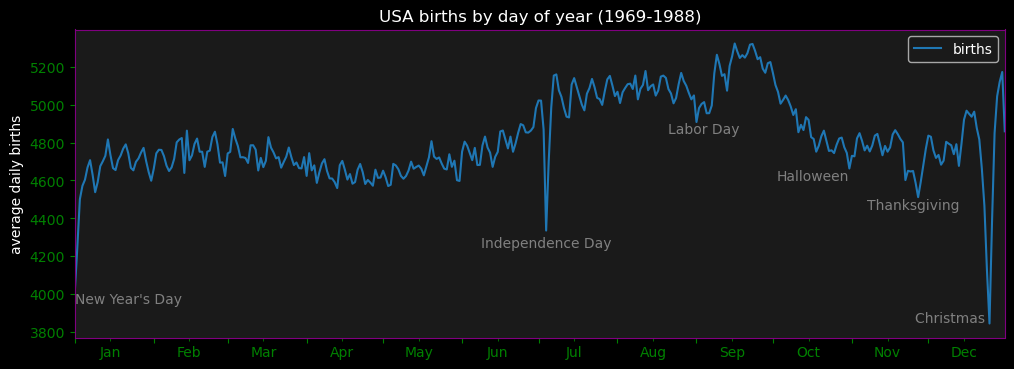

In [4]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

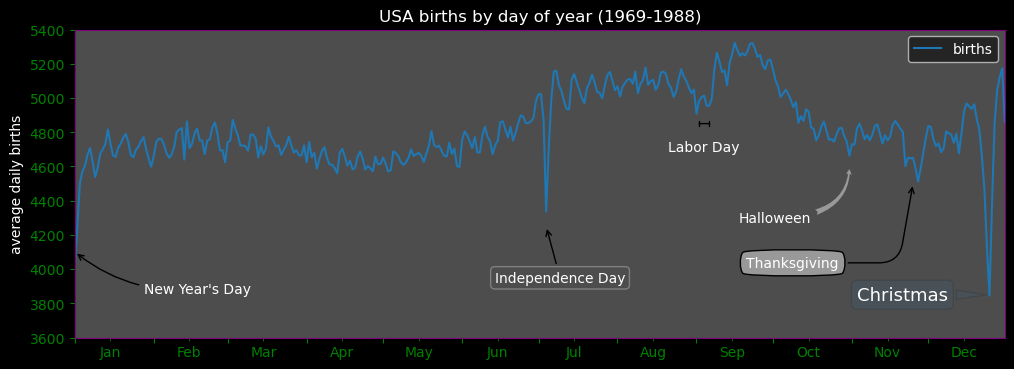

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.set_facecolor('.3')
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.6"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

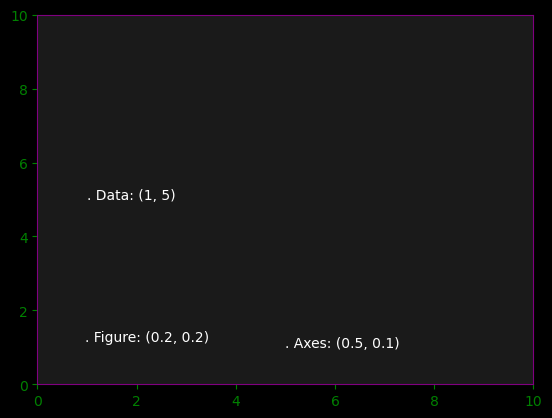

In [6]:
fig, ax = plt.subplots()
ax.axis([0, 10, 0, 10])


ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

In [7]:
#%matplotlib notebook
%matplotlib inline 

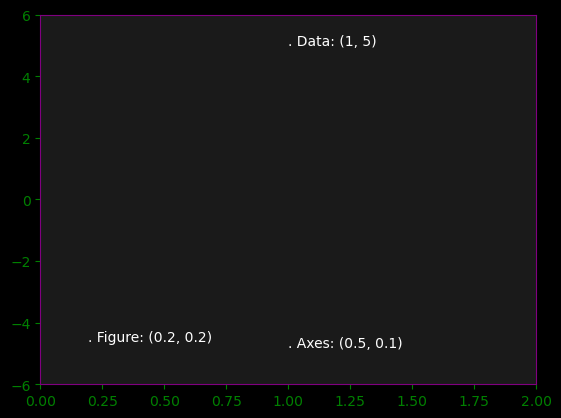

In [8]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

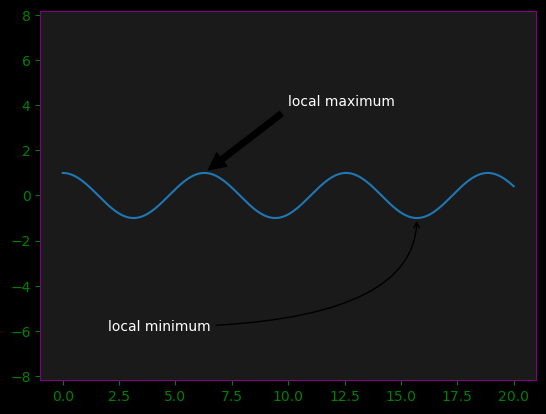

In [9]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"));

-----------------

In [10]:
import matplotlib as mpl
mpl.__version__

'3.7.2'

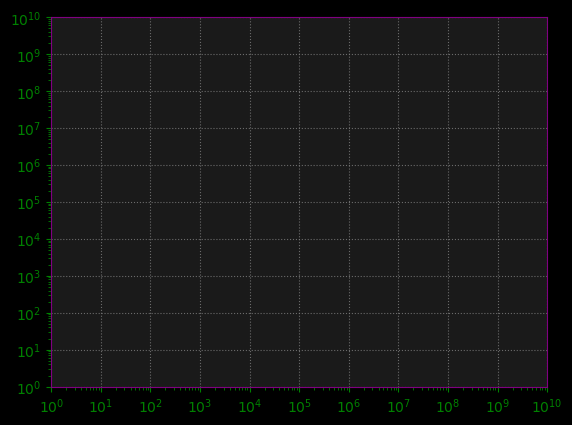

In [11]:
import matplotlib.ticker as ticker

ax = plt.axes(xscale='log', yscale='log')
ax.set_xlim(1,10**10)
ax.set_ylim(1,10**10)
ax.grid(alpha=.8,c='grey', linestyle='dotted')
ax.xaxis.set_major_locator(ticker.LogLocator(numticks=999))
ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

ax.yaxis.set_major_locator(ticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

In [12]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [13]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

In [14]:
#ax.xaxis.major.__dict__

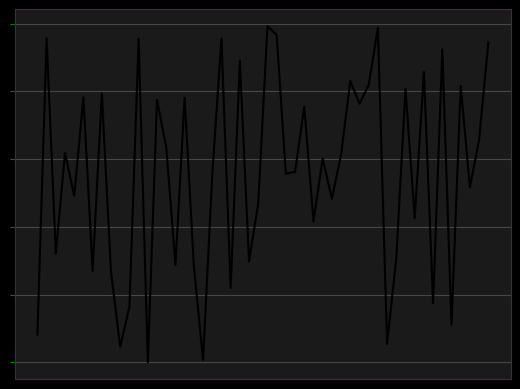

In [15]:
ax = plt.axes()
ax.plot(np.random.rand(50), c='black')
ax.grid(alpha=.3)

ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_formatter(plt.NullFormatter())

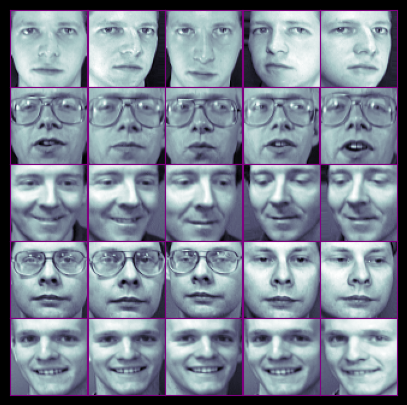

In [16]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))
fig.subplots_adjust(hspace=0, wspace=0)

# Get some face data from scikit-learn
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")

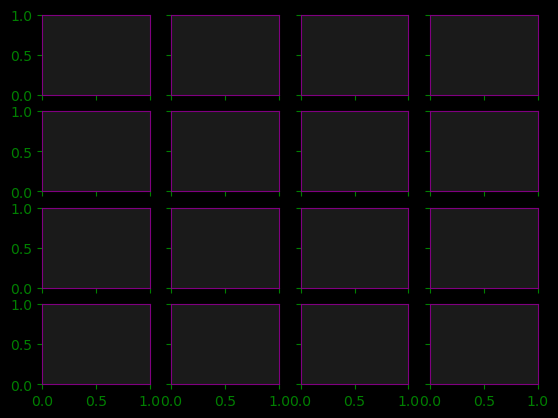

In [17]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

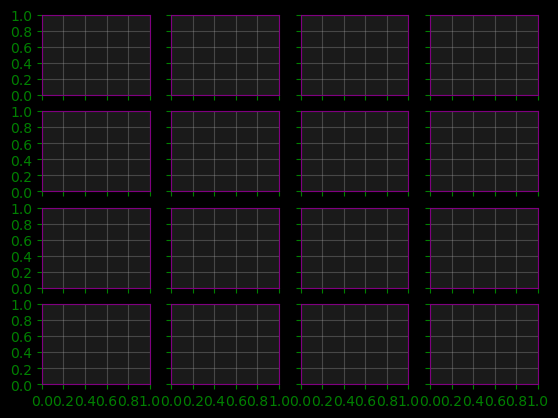

In [18]:
# For every axis, set the x and y major locator
for axi in ax.flat:
    axi.grid(alpha=.3)
    axi.xaxis.set_major_locator(plt.MaxNLocator(5))
    axi.yaxis.set_major_locator(plt.MaxNLocator(5))
fig

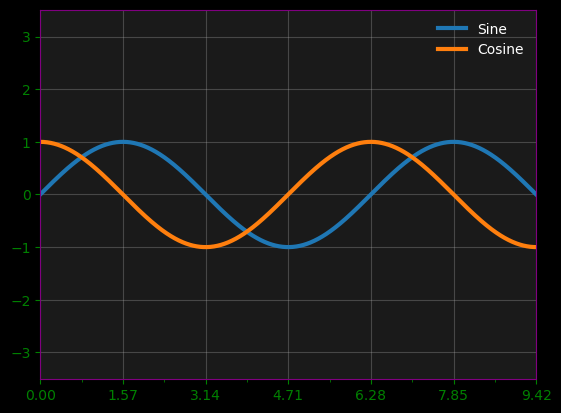

In [19]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

ax.grid(alpha=.3)
ax.legend(frameon=False)
ax.axis('equal')
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

ax.set_xlim(0, 3 * np.pi);

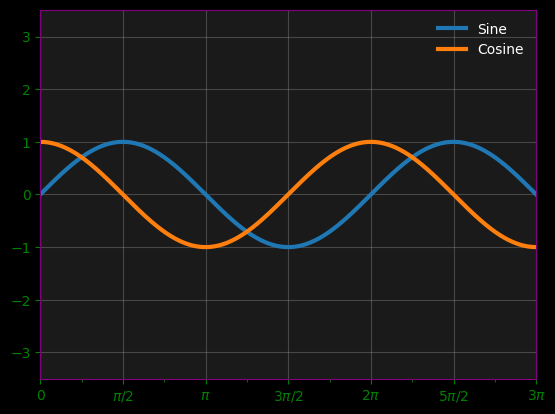

In [20]:
def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

In [21]:
#%matplotlib notebook
%matplotlib inline

| Locator Class        | Description                                        |
|----------------------|----------------------------------------------------|
| NullLocator          | No ticks                                           |
| FixedLocator         | Tick locations are fixed                          |
| IndexLocator         | Locator for index plots (e.g., x = range(len(y))) |
| LinearLocator        | Evenly spaced ticks from min to max               |
| LogLocator           | Logarithmically spaced ticks from min to max      |
| MultipleLocator      | Ticks and range are a multiple of base            |
| MaxNLocator          | Finds up to a max number of ticks at nice locations |
| AutoLocator          | (Default.) MaxNLocator with simple defaults       |
| AutoMinorLocator     | Locator for minor ticks                           |

| Formatter Class     | Description                                     |
|---------------------|-------------------------------------------------|
| NullFormatter       | No labels on the ticks                         |
| IndexFormatter      | Set the strings from a list of labels         |
| FixedFormatter      | Set the strings manually for the labels      |
| FuncFormatter       | User-defined function sets the labels       |
| FormatStrFormatter  | Use a format string for each value          |
| ScalarFormatter     | (Default.) Formatter for scalar values      |
| LogFormatter        | Default formatter for log axes               |

In [52]:
f = lambda x: 2**x
g = lambda x: x**2
h = lambda x: 2*x

X = np.linspace(0,10,1000)

f_values = list(map(f, X))
g_values = list(map(g, X))
h_values = list(map(g, X))

In [90]:
def get_func_val(func, start=0, end=20, num_points=1000):
    X = np.linspace(start, end, num_points)
    func_values = list(map(func, X))
    return X, func_values

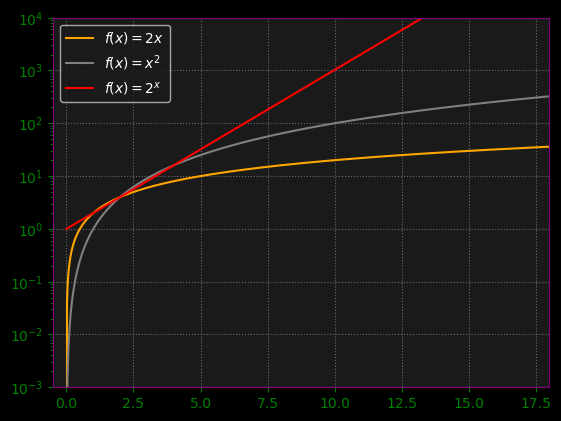

In [91]:
import matplotlib.ticker as ticker

ax = plt.axes(yscale='log')
ax.set_ylim(.001,10**4)
ax.set_xlim(-.5, 18)
ax.grid(alpha=.8,c='grey', linestyle='dotted')

ax.yaxis.set_major_locator(ticker.LogLocator(numticks=999))
ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

ax.plot(*get_func_val(lambda x: 2*x), color='orange', label='$f(x)= 2x$')
ax.plot(*get_func_val(lambda x: x**2), color='grey',label='$f(x)= x^2$')
ax.plot(*get_func_val(lambda x: 2**x), color='red', label='$f(x)= 2^x$')
ax.legend();